In [2]:
import os
import yaml
import pyEXP
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

config.yaml  file.list	sandbox.ipynb  test.ipynb  test_part2.ipynb


In [5]:
os.chdir('/home/marcoritou/EXP_PHD/data/self_training/')
yaml_config = ""
with open('config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    yaml_config = yaml.dump(config)
os.chdir('/home/marcoritou/EXP_PHD/data/EXP-examples/Nbody/')
basis = pyEXP.basis.Basis.factory(yaml_config)

---- SLGridSph::ReadH5Cache: successfully read basis cache <test_cache.hdf5>
SphericalSL::orthoTest: worst=0.00285609


In [6]:
# reading coefficients
coefs = pyEXP.coefs.Coefs.factory('/home/marcoritou/EXP_PHD/data/EXP-examples/Nbody/test_better_coefs.hdf5')
print(coefs.getName())

dark halo


Time field pairs


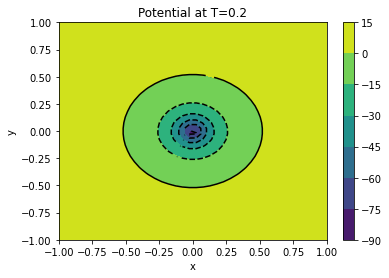

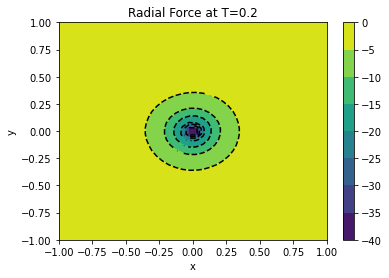

In [12]:
times = coefs.Times()
pmin = [-1.0,-1.0, 0.0]
pmax = [ 1.0, 1.0, 0.0]
grid = [  40,  40,   0]

fields = pyEXP.field.FieldGenerator(times, pmin, pmax, grid)
surfaces = fields.slices(basis, coefs)

print("Time field pairs")
final = 0.0
for v in surfaces:
    #print('-'*40)
    for u in surfaces[v]:
        #print("{:8.4f} {}".format(v, u))
        final = v

x = np.linspace(pmin[0], pmax[0], grid[0])
y = np.linspace(pmin[1], pmax[1], grid[1])
xv, yv = np.meshgrid(x, y)

cont1 = plt.contour(xv, yv, surfaces[final]['potl'].transpose(), colors='k')
plt.clabel(cont1, fontsize=0, inline=True)
cont2 = plt.contourf(xv, yv, surfaces[final]['potl'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential at T={}'.format(final))
plt.show()

cont1 = plt.contour(xv, yv, surfaces[final]['rad force'].transpose(), colors='k')
plt.clabel(cont1, fontsize=0, inline=True)
cont2 = plt.contourf(xv, yv, surfaces[final]['rad force'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Radial Force at T={}'.format(final))
plt.show()

In [14]:
surfaces[final].keys()

dict_keys(['azi force', 'dens', 'dens m=0', 'dens m>0', 'mer force', 'potl', 'potl m=0', 'potl m>0', 'rad force'])

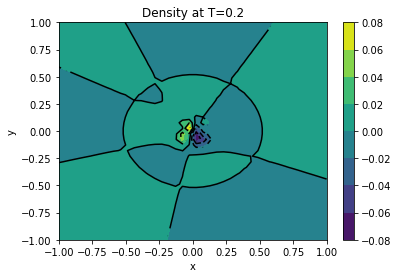

In [18]:
cont1 = plt.contour(xv, yv, surfaces[final]['azi force'].transpose(), colors='k')
plt.clabel(cont1, fontsize=0, inline=True)
cont2 = plt.contourf(xv, yv, surfaces[final]['azi force'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Density at T={}'.format(final))
plt.show()

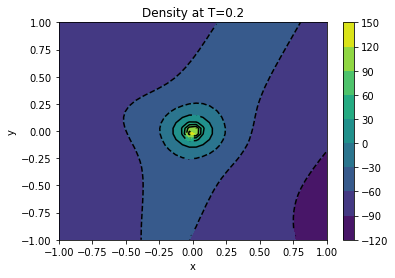

In [17]:
cont1 = plt.contour(xv, yv, surfaces[final]['dens'].transpose(), colors='k')
plt.clabel(cont1, fontsize=0, inline=True)
cont2 = plt.contourf(xv, yv, surfaces[final]['dens'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Density at T={}'.format(final))
plt.show()

Keys= [[1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 0, 5], [1, 0, 6], [1, 0, 7], [1, 0, 8], [1, 0, 9], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7], [1, 1, 8], [1, 1, 9]]
Window=10 PC number=10
---- Eigen is using 8 threads
shape U = 300 x 10


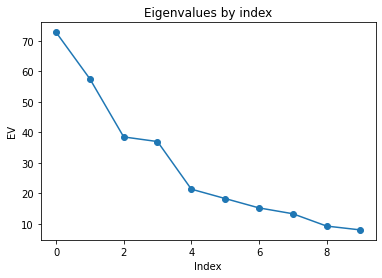

In [20]:
keylst = coefs.makeKeys([1])
print("Keys=", keylst)

name = 'dark halo'
config = {name: (coefs, keylst, [])}

window = int(len(coefs.Times())/2)
npc = 10

print("Window={} PC number={}".format(window, npc))

ssa = pyEXP.mssa.expMSSA(config, window, npc)

ev = ssa.eigenvalues()

plt.plot(ev, 'o-')
plt.xlabel("Index")
plt.ylabel("EV")
plt.title("Eigenvalues by index")
plt.show()

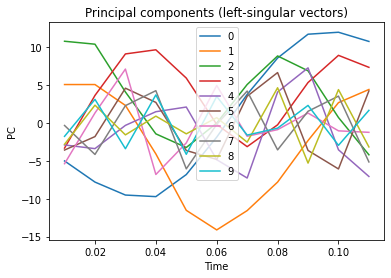

In [21]:
times = coefs.Times();
pc    = ssa.getPC();

rows, cols = pc.shape

for i in range(cols):
    plt.plot(times[0:rows], pc[:,i], '-', label="{:d}".format(i))

plt.xlabel('Time')
plt.ylabel('PC')
plt.legend()
plt.title("Principal components (left-singular vectors)")
plt.show()

In [22]:
ssa.reconstruct([0, 1, 2, 3])

coefs.zerodata() # <---replace with reconstructed
newdata = ssa.getReconstructed()
print('newdata is a', type(newdata))

newdata is a <class 'dict'>


In [23]:
# Print k-means groups
#
ssa.kmeans()

----------------------------------------
---- K-means group analysis
---- numT=20 numW=10
----------------------------------------
------------------------------------------------------------
 *** n=(1,0,0,c)_0
------------------------------------------------------------
     0           0
     1           0
     2           1
     3           1
     4           0
     5           0
     6           0
     7           0
     8           0
     9           0
------------------------------------------------------------
 *** n=(1,0,1,c)_0
------------------------------------------------------------
     0           0
     1           1
     2           1
     3           1
     4           0
     5           0
     6           0
     7           0
     8           0
     9           0
------------------------------------------------------------
 *** n=(1,0,2,c)_0
------------------------------------------------------------
     0           0
     1           0
     2           1
     3   

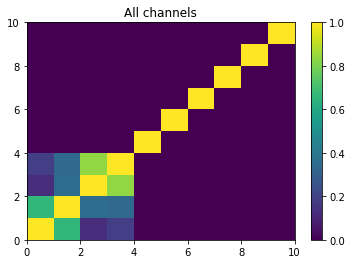

In [24]:
mat = ssa.wCorrAll()
x = plt.pcolormesh(mat)
plt.title("All channels")
plt.colorbar(x)
plt.show()

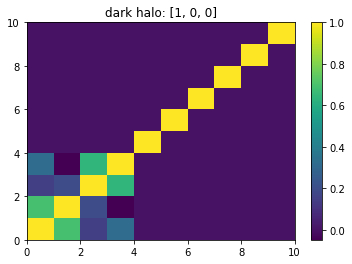

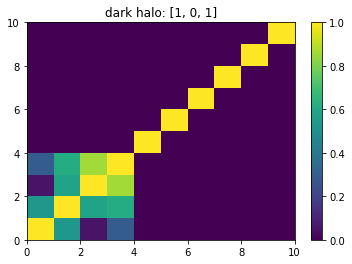

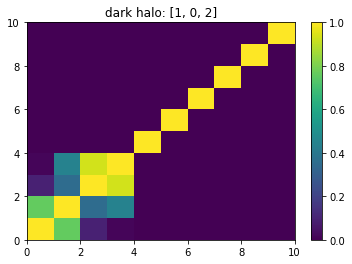

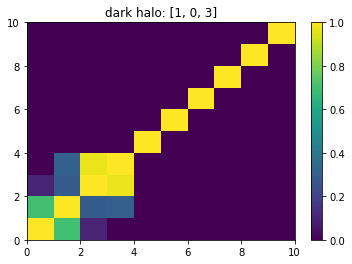

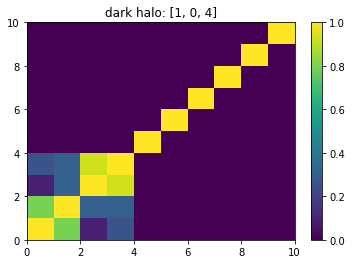

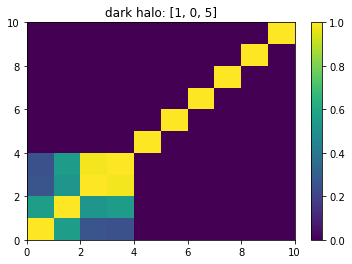

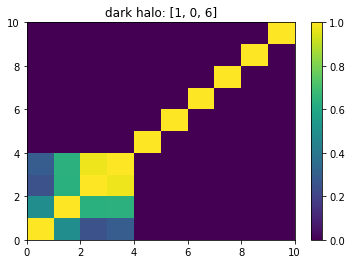

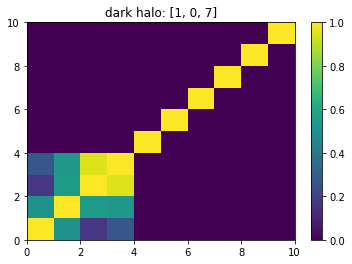

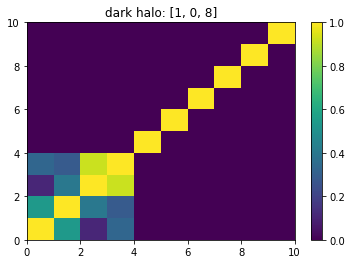

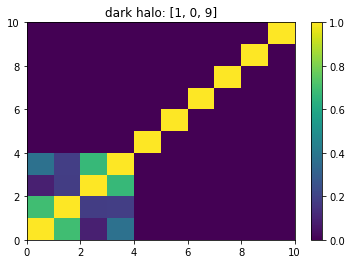

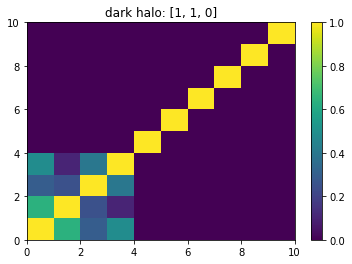

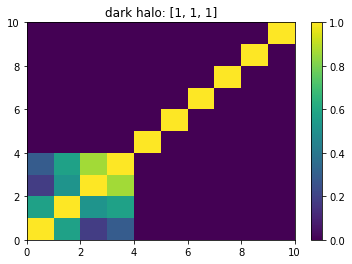

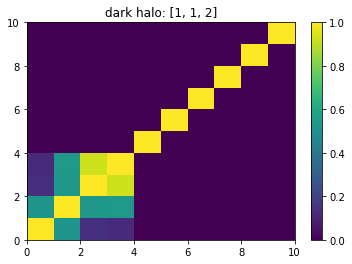

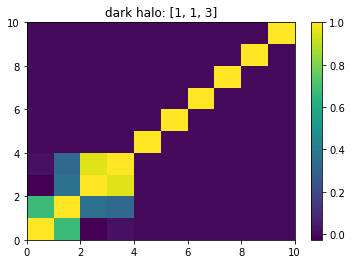

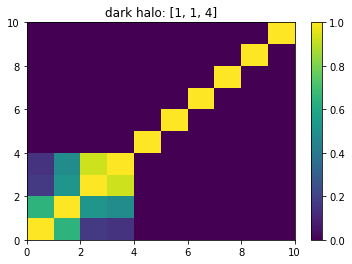

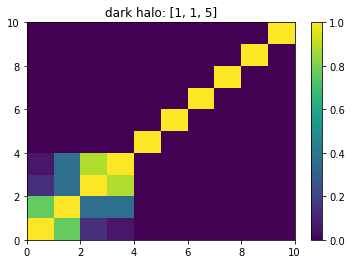

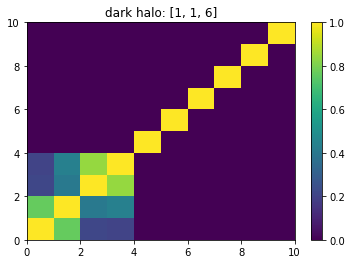

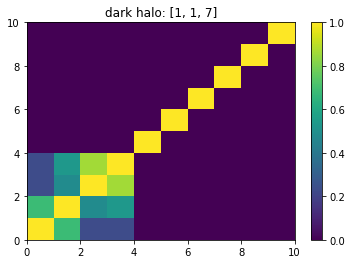

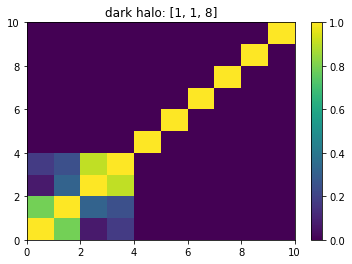

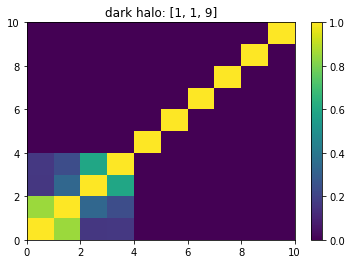

In [25]:
# Get and view the w-correlation matrices
# for each key individually
#
for k in keylst:
    mat = ssa.wCorr(name, k)
    # Plot it
    x = plt.pcolormesh(mat)
    plt.title('{}: {}'.format(name,k))
    plt.colorbar(x)
    plt.show()